In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

import sys
sys.path.append(r"../../functions")
import calculations
import plotting

In [14]:
import openpyxl

#Tunisia GDP
tn_gdp = pd.read_csv("GDP-TUN-Annual.csv")
tn_gdp.columns = ["date", "gdp_usd"]
# Convert 'date' to datetime format
tn_gdp["date"] = pd.to_datetime(tn_gdp["date"])
tn_gdp["gdp_usd"] = tn_gdp["gdp_usd"].round(0)

#Tunisia Minimum Wage
tn_wage=pd.read_excel("MinWage-TN-Annual.xlsx")
tn_wage.columns = ["date", "wage_hourly_TND"]
tn_wage = tn_wage.sort_values(by="date").reset_index(drop=True)
tn_wage["date"] = pd.to_datetime(tn_gdp["date"])


In [55]:
conversion_rates=pd.read_csv("exchange-rate.csv")
new_rates = pd.read_csv("TND_to_USD_Exchange_Rates_2011_2024.csv")

conversion_rates.columns = ["date", "conversionRate"]
conversion_rates['date'] = pd.to_datetime(conversion_rates['date'])
conversion_rates = conversion_rates[conversion_rates['date'].dt.year >= 1990]


new_rates.columns = ["date", "conversionRate"]
new_rates['date'] = pd.to_datetime(new_rates['date'], format='%Y')

full_rates = pd.concat([conversion_rates, new_rates], ignore_index=True)


tn_wage_usd = pd.merge(tn_wage, full_rates, on='date', how='inner')
tn_wage_usd['Wage_USD'] = tn_wage_usd['wage_hourly_TND'] *  tn_wage_usd['conversionRate']



In [51]:
print("TUNISIA Wage Data:")
display(tn_wage.head())

print("TUNISIA GDP Data:")
display(tn_gdp.head())

print("exchange rates")
display(conversion_rates.head())

print("exchange rates")
display(new_rates.head())

display(full_rates.head())

TUNISIA Wage Data:


,date,wage_hourly_TND
0,1990-01-01,0.6
1,1991-01-01,0.6
2,1992-01-01,0.7
3,1993-01-01,0.7
4,1994-01-01,0.7


TUNISIA GDP Data:


,date,gdp_usd
0,1990-01-01,1.229057e+10
1,1991-01-01,1.307478e+10
2,1992-01-01,1.549671e+10
3,1993-01-01,1.460834e+10
4,1994-01-01,1.563317e+10


exchange rates


,date,conversionRate
40,1990-01-01,0.878333
41,1991-01-01,0.924621
42,1992-01-01,0.884433
43,1993-01-01,1.003742
44,1994-01-01,1.011554


exchange rates


,date,conversionRate
0,2011-01-01,0.7109
1,2012-01-01,0.6337
2,2013-01-01,0.6073
3,2014-01-01,0.5742
4,2015-01-01,0.5211


,date,conversionRate
0,1990-01-01,0.878333
1,1991-01-01,0.924621
2,1992-01-01,0.884433
3,1993-01-01,1.003742
4,1994-01-01,1.011554


In [ ]:


Mean_TNGDP = calculations.arithmeticMean(tn_gdp.gdp_usd)
variance_TNGDP = calculations.variance(tn_gdp.gdp_usd)
standarddeviation_TNGDP = calculations.standardDeviation(tn_gdp.gdp_usd)
quartiles_TNGDP = calculations.quartiles(tn_gdp.gdp_usd)

#print(annual_avg)
print(len(tn_gdp.gdp_usd))
print(f"Mean = {round(Mean_TNGDP, 2)}")
print(f"Variance = {round(variance_TNGDP,2)}")
print(f"Standard Deviation = {round(standarddeviation_TNGDP, 2)}")
print(f"Quartiles = {quartiles_TNGDP}")


34
Mean = 33332906299.06
Variance = 1.6405692957276927e+20
Standard Deviation = 12808471008.39
Quartiles = {'Q1': 21473528161.0, 'Q2': 36646009234.0, 'Q3': 44859439902.0}


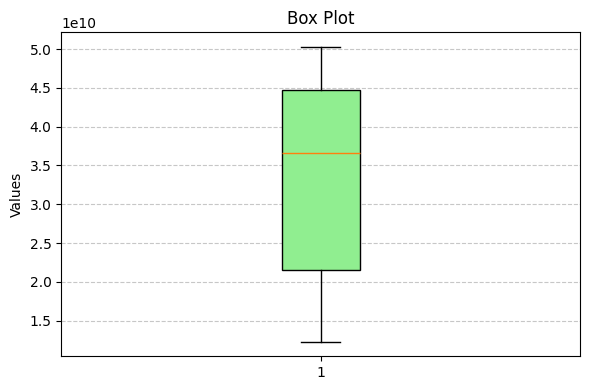

In [ ]:
lot_boxplot_TNGDP = plotting.plot_boxplot(tn_gdp.gdp_usd, title="Box Plot", ylabel="Values", showfliers=True, color="lightgreen")

In [ ]:
Mean_TNWAge = calculations.arithmeticMean(tn_gdp.gdp_usd)
variance_TNGDP = calculations.variance(tn_gdp.gdp_usd)
standarddeviation_TNGDP = calculations.standardDeviation(tn_gdp.gdp_usd)
quartiles_TNGDP = calculations.quartiles(tn_gdp.gdp_usd)

#print(annual_avg)
print(len(tn_gdp.gdp_usd))
print(f"Mean = {round(Mean_TNGDP, 2)}")
print(f"Variance = {round(variance_TNGDP,2)}")
print(f"Standard Deviation = {round(standarddeviation_TNGDP, 2)}")
print(f"Quartiles = {quartiles_TNGDP}")
